# Informe #1 sobre Machine Learning:
## Redes neuronales
William A. Ballesteros, Lina Duque, Esteban Lopez

In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings

Cargamos el archivo "games.csv"

In [2]:
fileToRead = r"C:\Users\zense\Desktop\Informe ML IA\games.csv"
data = pd.read_csv(fileToRead, sep = ";")
data.columns = ["gameDuration",
                "firstBlood", 
                "firstTower", 
                "firstInhibitor", 
                "firstBaron", 
                "firstDragon", 
                "firstRiftHerald", 
                "t1_towerKills", 
                "t1_inhibitorKills", 
                "t1_baronKills", 
                "t1_dragonKills", 
                "t1_riftHeraldKills", 
                "t2_towerKills",
                "t2_inhibitorKills",
                "t2_baronKills",
                "t2_dragonKills",
                "t2_riftHeraldKills",
                "winner"]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

In [4]:
data.select_dtypes(include=['int64']).describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# Se separan los datos en entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split
N = len(data)
cTrain = int(N*0.8)
cTest = N-cTrain
print(N, cTrain, cTest)
train_data, test_data = sklearn.model_selection.train_test_split(data, train_size = cTrain, test_size = cTest)

50286 40228 10058


In [6]:
train_data.shape

(40228, 18)

In [7]:
train_data.head()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
15272,1860,2,2,1,1,2,1,11,4,1,2,1,1,0,0,1,0,1
11002,2471,1,1,1,2,2,0,8,2,0,2,0,8,1,1,1,0,2
23252,1392,1,1,1,0,1,0,11,3,0,2,0,0,0,0,0,0,1
2331,2332,1,2,2,2,2,0,4,0,1,1,0,6,2,1,3,0,2
28718,1418,1,1,1,1,2,1,9,2,1,1,1,3,0,0,1,0,1


# Pipeline para atributos numéricos

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#11 Atributos Numericos
num_attributes = ['gameDuration',  
                  't1_towerKills',
                  't1_inhibitorKills', 
                  't1_baronKills', 
                  't1_dragonKills', 
                  't1_riftHeraldKills', 
                  't2_towerKills', 
                  't2_inhibitorKills', 
                  't2_baronKills', 
                  't2_dragonKills', 
                  't2_riftHeraldKills']

num_pipeline= Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])

# Pipeline para atributos categóricos

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 6 Atributos Categóricos
cat_attributes = ['firstBlood',
                  'firstTower', 
                  'firstInhibitor', 
                  'firstBaron',
                  'firstDragon', 
                  'firstRiftHerald']

cat_pipeline= Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

# Se juntan los pipeline

In [13]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes), 
])

In [14]:
X_train = full_pipeline.fit_transform(train_data)

In [15]:
X_train.shape

(40228, 28)

In [16]:
X_train[0,:]

array([-0.02673434,  1.38044245,  2.33032748,  1.06109786,  0.48097889,
        1.70026426, -1.22706879, -0.80073802, -0.68823314, -0.35980257,
       -0.57034626,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ])

In [17]:
y_train = train_data["winner"]
y_train

15272    1
11002    2
23252    1
2331     2
28718    1
        ..
45026    1
9453     1
18081    2
6767     2
17552    1
Name: winner, Length: 40228, dtype: int64

# Entrenamiento de las redes neuronales
Se crean los cinco modelos

### Modelo 1

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo1 = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3,5), random_state=123)
modelo1.fit(X_train, y_train)
scores1 = cross_val_score(modelo1, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores1)
scores1.mean()

C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converg

[-0.02224708 -0.02423565 -0.02398707 -0.02113114 -0.02386576]


C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


-0.023093338227503847

### Modelo 2

In [19]:
modelo2 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(2,5,3), random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores2)
scores2.mean()

C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[-0.0254785  -0.02597564 -0.02361422 -0.02150404 -0.02436296]


C:\Users\zense\.conda\envs\InformeIA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.024187071016607893

### Modelo 3

In [31]:
modelo3 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(12,22,35,17), random_state=123)
modelo3.fit(X_train, y_train)
scores3 = cross_val_score(modelo3, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores3)
scores3.mean()

[-0.02025851 -0.02411136 -0.02000994 -0.02200124 -0.02336855]


-0.021949922192267057

### Modelo 4

In [32]:
modelo4 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(2,5,7,2), random_state=123)
modelo4.fit(X_train, y_train)
scores4 = cross_val_score(modelo4, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores4)
scores4.mean()

[-0.02535421 -0.02473279 -0.02324136 -0.02262275 -0.02436296]


-0.024062813465210216

### Modelo 5

In [33]:
modelo5 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(4,2,8,3,7), random_state=123)
modelo5.fit(X_train, y_train)
scores5 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores5)
scores5.mean()

[-0.49465573 -0.49478001 -0.49478001 -0.49471722 -0.49471722]


-0.49473003814146965

# Se usan los modelos en el conjunto de prueba

In [34]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.26908062, -0.22265715, -0.82016281, ...,  0.        ,
         1.        ,  0.        ],
       [-0.18175081,  0.57889265, -0.03254024, ...,  0.        ,
         1.        ,  0.        ],
       [-0.38327222, -1.55857348, -0.82016281, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.79295861,  0.57889265,  1.5427049 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.14821282, -0.22265715, -0.03254024, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.40066822,  0.04452612, -0.03254024, ...,  1.        ,
         0.        ,  0.        ]])

In [35]:
y_pred1 = modelo1.predict(X_test)
y_pred1

array([1, 1, 2, ..., 1, 1, 2], dtype=int64)

In [36]:
y_pred2 = modelo2.predict(X_test)
y_pred2

array([1, 1, 2, ..., 1, 1, 2], dtype=int64)

In [37]:
y_pred3 = modelo3.predict(X_test)
y_pred3

array([1, 1, 2, ..., 1, 1, 2], dtype=int64)

In [38]:
y_pred4 = modelo4.predict(X_test)
y_pred4

array([1, 1, 2, ..., 1, 1, 2], dtype=int64)

In [39]:
y_pred5 = modelo5.predict(X_test)
y_pred5

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
y_test = test_data["winner"]

In [41]:
y_test

26937    1
22958    1
20453    2
47462    1
12635    1
        ..
16354    1
42854    2
20999    1
15831    1
4738     2
Name: winner, Length: 10058, dtype: int64

In [42]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred1
       )
print(f"El error medio absoluto del modelo 1 es: {mae}")

El error medio absoluto del modelo 1 es: 0.020580632332471663


In [43]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred2
       )
print(f"El error medio absoluto del modelo 2 es: {mae}")

El error medio absoluto del modelo 2 es: 0.0216742891230861


In [44]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred3
       )
print(f"El error medio absoluto del modelo 3 es: {mae}")

El error medio absoluto del modelo 3 es: 0.01779677868363492


In [45]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred4
       )
print(f"El error medio absoluto del modelo 2 es: {mae}")

El error medio absoluto del modelo 2 es: 0.021773712467687414


In [46]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred5
       )
print(f"El error medio absoluto del modelo 2 es: {mae}")

El error medio absoluto del modelo 2 es: 0.48995824219526746


# Se sacan los valores de accuracy

In [63]:
from sklearn.metrics import accuracy_score
accMod1=accuracy_score(y_test, y_pred1)
print(accMod1)

0.9794193676675284


In [64]:
from sklearn.metrics import accuracy_score
accMod2=accuracy_score(y_test, y_pred2)
print(accMod2)

0.9783257108769139


In [65]:
from sklearn.metrics import accuracy_score
accMod3=accuracy_score(y_test, y_pred3)
print(accMod3)

0.9822032213163651


In [66]:
from sklearn.metrics import accuracy_score
accMod4=accuracy_score(y_test, y_pred4)
print(accMod4)

0.9782262875323126


In [67]:
from sklearn.metrics import accuracy_score
accMod5=accuracy_score(y_test, y_pred5)
print(accMod5)

0.5100417578047326


## Tabla con todas las _accuracies_ resumidas

In [68]:
data = {'Número de Modelo':  ['1', '2', '3', '4', '5'],
        'second_column': [accMod1, accMod2, accMod3, accMod4, accMod5]
        }

df = pd.DataFrame(data)

print (df)

  Número de Modelo  second_column
0                1       0.979419
1                2       0.978326
2                3       0.982203
3                4       0.978226
4                5       0.510042


# Se sacan las matrices de confusión

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test, y_pred1)
confusion_matrix1

array([[5011,  119],
       [  88, 4840]], dtype=int64)

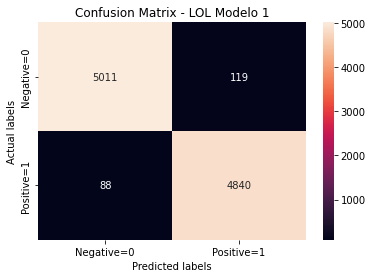

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot = True, ax = ax, fmt = 'd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix - LOL Modelo 1')
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix2 = confusion_matrix(y_test, y_pred2)
confusion_matrix2

array([[5020,  110],
       [ 108, 4820]], dtype=int64)

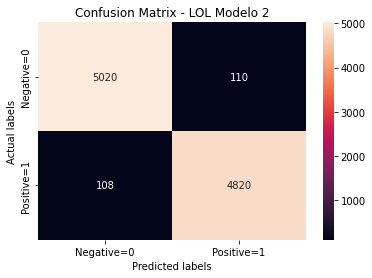

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot = True, ax = ax, fmt = 'd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix - LOL Modelo 2')
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix3 = confusion_matrix(y_test, y_pred3)
confusion_matrix3

array([[5034,   96],
       [  83, 4845]], dtype=int64)

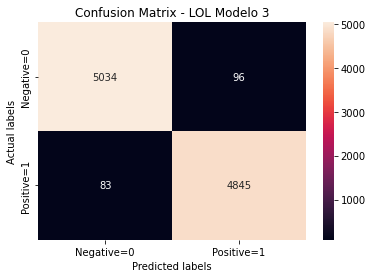

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix3, annot = True, ax = ax, fmt = 'd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix - LOL Modelo 3')
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix4 = confusion_matrix(y_test, y_pred4)
confusion_matrix4

array([[5020,  110],
       [ 109, 4819]], dtype=int64)

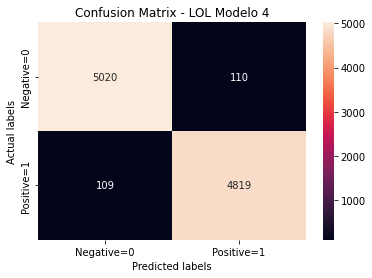

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix4, annot = True, ax = ax, fmt = 'd')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix - LOL Modelo 4')
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix5 = confusion_matrix(y_test, y_pred5)
confusion_matrix5

array([[5130,    0],
       [4928,    0]], dtype=int64)

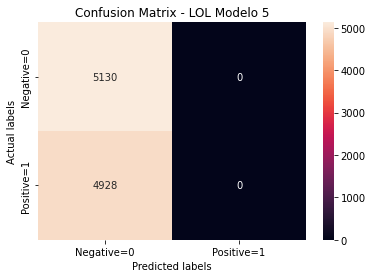

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix5, annot = True, ax = ax, fmt = 'd')

#este es el modelo que hemos dejado con un accuracy muy bajo (51%),y aquí se evidencia como identifica efectivamente que
#se encuentre lo predecido, o falla
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix - LOL Modelo 5')
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

# Mejores Hiperparámetros hasta este momento
#### Modelo 3
activation='relu <br>
solver='sgd'<br>
alpha=1e-5<br>
hidden_layer_sizes=(12,22,35,17)<br>
random_state=123

# Se añade un hiperparámetro diferente

### Variación 1

In [75]:
modelo3Modified1 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(12,22,35,17), random_state=123, learning_rate='invscaling')
modelo3Modified1.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 22, 35, 17),
              learning_rate='invscaling', random_state=123, solver='sgd')

In [83]:
y_pred1Mod3 = modelo3Modified.predict(X_test)
accM1=accuracy_score(y_test, y_pred1Mod3)
print(accM1)

0.9168820839133028


In [76]:
modelo3Modified2 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(12,22,35,17), random_state=123, learning_rate='adaptive')
modelo3Modified2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 22, 35, 17),
              learning_rate='adaptive', random_state=123, solver='sgd')

In [81]:
y_pred2Mod3 = modelo3Modified2.predict(X_test)
accM2=accuracy_score(y_test, y_pred2Mod3)
print(accM2)

0.9814078345595546


## Hacemos análisis de las _accuracies_ ¿Mejoraron o empeoraron?

In [88]:
print("Primera modificación: ", accM1, "\nSegunda Modificación: ", accM2,"\nValor Previo: ", accMod3)

Primera modificación:  0.9168820839133028 
Segunda Modificación:  0.9814078345595546 
Valor Previo:  0.9822032213163651


Como se puede notar con los valores previos, la implementación del hiperparámetro "learning_rate" tuvo un efecto negativo en la certeza del modelo, en el peor caso se disminuyó dicha certeza un ~6.53%, y en el otro caso un ~0.07%